In [1]:
import init_notebooks
from data.load_data import load_data 
from models.train_model import split_data, scaled ,train
from models.evaluation import accuracy , heat_cm , cross_validation_metrics
from models.predict_model import load_model, predict_model

In [2]:
df_train = load_data('processed_train')
df_test = load_data('processed_test')

In [3]:
X_train = df_train.drop("TN3", axis=1)
y_train = df_train["TN3"]

X_test = df_test.drop("TN3", axis=1)
y_test = df_test["TN3"]

In [4]:
X_train , X_test   = scaled(X_train,X_test)


=== RÉSULTATS MODÈLE ===
Accuracy : 0.977
Precision : 0.901
Recall : 0.620
F1-Score : 0.735
PR-AUC : 0.832

=== Rapport détaillé ===
              precision    recall  f1-score   support

NON OBSERVEE       0.90      0.62      0.73       498
    OBSERVEE       0.98      1.00      0.99      9363

    accuracy                           0.98      9861
   macro avg       0.94      0.81      0.86      9861
weighted avg       0.98      0.98      0.98      9861



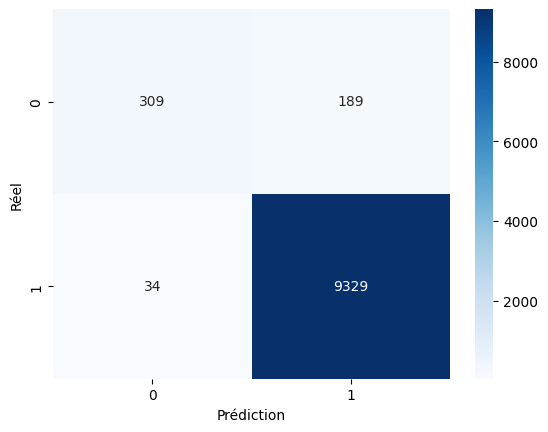

In [5]:
model = train(X_train, y_train, "random_forest")

model = load_model()
y_pred = predict_model(model, X_test)

accuracy(y_test ,y_pred, X_test, model, positive_class='NON OBSERVEE')

heat_cm(y_test ,y_pred)

In [6]:
cross_validation_metrics(model, X_train, y_train, positive_class='NON OBSERVEE')

Accuracy     : 0.975 (+/- 0.001)
Precision    : 0.892 (+/- 0.023)
Recall       : 0.566 (+/- 0.015)
F1           : 0.693 (+/- 0.012)
PR-AUC       : 0.844 (+/- 0.001)


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)


rfc = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=200)
rfc.fit(X_res, y_res)

y_pred = predict_model(rfc, X_test)

accuracy(y_test ,y_pred, X_test, model, positive_class='NON OBSERVEE')


=== RÉSULTATS MODÈLE ===
Accuracy : 0.979
Precision : 0.842
Recall : 0.729
F1-Score : 0.781
PR-AUC : 0.795

=== Rapport détaillé ===
              precision    recall  f1-score   support

NON OBSERVEE       0.84      0.73      0.78       498
    OBSERVEE       0.99      0.99      0.99      9363

    accuracy                           0.98      9861
   macro avg       0.91      0.86      0.89      9861
weighted avg       0.98      0.98      0.98      9861



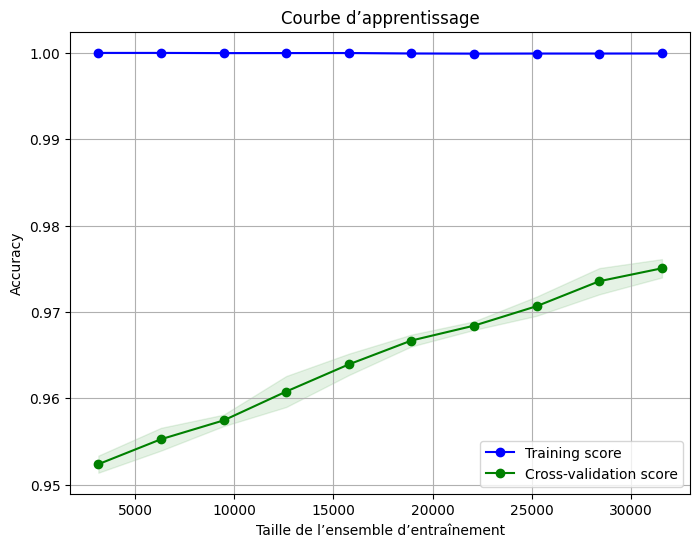

In [8]:
import init_notebooks
from models.evaluation import plot_learning_curve 

plot_learning_curve(model, X_train, y_train)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

y_prob = model.predict_proba(X_test)[:, list(model.classes_).index('NON OBSERVEE')]
y_true = (y_test == 'NON OBSERVEE').astype(int)


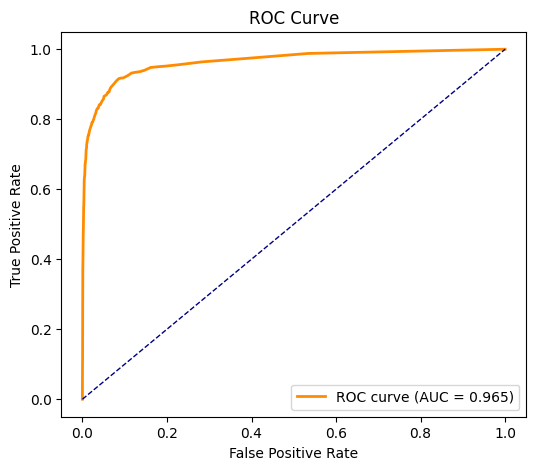

In [ ]:
fpr, tpr, _ = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


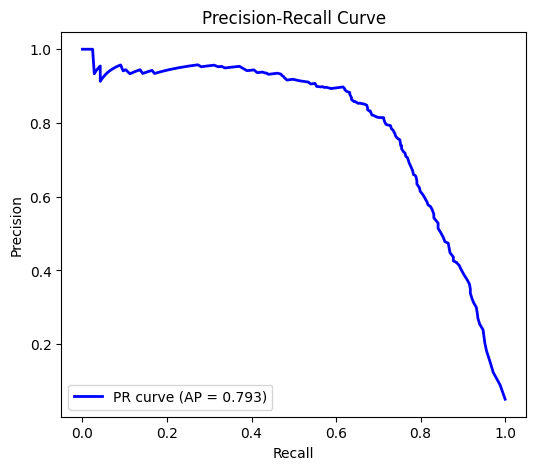

In [ ]:
precision, recall, _ = precision_recall_curve(y_true, y_prob)
avg_precision = average_precision_score(y_true, y_prob)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AP = {avg_precision:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

In [12]:
importances = model.feature_importances_
features = df_train.drop(columns=["TN3" , "lon","lat"]).columns

for feat, imp in sorted(zip(features, importances), key=lambda x: x[1], reverse=True):
    print(f"{feat}: {imp:.4f}")

Numero_grappe: 0.1454
Score_richesse_menage: 0.1426
Numero_menage: 0.0945
taille_menage: 0.0940
Poids_menage: 0.0901
Age: 0.0687
adultes: 0.0535
enfants: 0.0525
Region: 0.0411
Quintile_richesse_menage: 0.0361
Niveau_edu_chef: 0.0271
Niveau_edu_pere: 0.0171
Niveau_edu_mere: 0.0138
Milieu_urbain_rural: 0.0130
Presence_parents: 0.0060
ratio_enfants_adultes: 0.0056
Presence_parents_menage: 0.0015
niveau_education_max: 0.0000
